# Simple MNIST convnet

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [57]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

## Prepare the data

In [20]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [21]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

2022-08-20 12:35:26.907037: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Train the model

In [22]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 24s 55ms/step - loss: 0.3660 - accuracy: 0.8899 - val_loss: 0.0907 - val_accuracy: 0.9752
Epoch 2/15
422/422 [==============================] - 23s 53ms/step - loss: 0.1165 - accuracy: 0.9639 - val_loss: 0.0623 - val_accuracy: 0.9832
Epoch 3/15
422/422 [==============================] - 23s 56ms/step - loss: 0.0881 - accuracy: 0.9728 - val_loss: 0.0516 - val_accuracy: 0.9862
Epoch 4/15
422/422 [==============================] - 24s 56ms/step - loss: 0.0733 - accuracy: 0.9772 - val_loss: 0.0502 - val_accuracy: 0.9870
Epoch 5/15
422/422 [==============================] - 26s 62ms/step - loss: 0.0658 - accuracy: 0.9801 - val_loss: 0.0416 - val_accuracy: 0.9890
Epoch 6/15
422/422 [==============================] - 25s 60ms/step - loss: 0.0598 - accuracy: 0.9817 - val_loss: 0.0374 - val_accuracy: 0.9905
Epoch 7/15
422/422 [==============================] - 23s 54ms/step - loss: 0.0544 - accuracy: 0.9834 - val_loss: 0.0373 - val_accuracy:

## Evaluate the trained model

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02714177593588829
Test accuracy: 0.9909999966621399


Produce a confussian matrix in order to highlight any model weaknesses

In [26]:
# Get model predictions
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


array([4.1622542e-10, 6.1439867e-11, 2.6051941e-06, 2.7861938e-06,
       4.3676319e-14, 2.5703219e-11, 7.1886561e-18, 9.9999452e-01,
       2.0097626e-09, 1.0936930e-07], dtype=float32)

In [29]:
y_pred2 = y_pred.argmax(axis=1)
y_test2 = y_test.argmax(axis=1)
y_pred2, y_test2

(array([7, 2, 1, ..., 4, 5, 6]), array([7, 2, 1, ..., 4, 5, 6]))

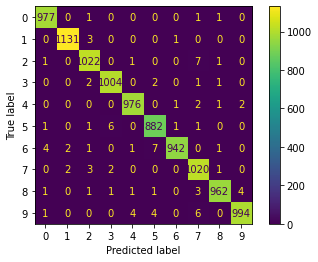

In [54]:
labels = list((range(num_classes)))
cm = confusion_matrix(y_test2, y_pred2, labels=labels, normalize=None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.viridis)
plt.show()

## Save the trained model

In [59]:
version = 1
model_path =  Path.cwd().parent.joinpath("models", 'mnist_convnet', str(version))
keras.models.save_model(
    model, 
    model_path, 
    overwrite=True, 
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None)

print("Saved model to", model_path)

INFO:tensorflow:Assets written to: /Users/philipredford-jones/Documents/Projects/ClarityMLE/models/mnist_convnet/1/assets


INFO:tensorflow:Assets written to: /Users/philipredford-jones/Documents/Projects/ClarityMLE/models/mnist_convnet/1/assets


Saved model to /Users/philipredford-jones/Documents/Projects/ClarityMLE/models/mnist_convnet/1


In [60]:
# We can re-load the model using:
model2 = keras.models.load_model(model_path)

In [70]:
model2.predict(np.expand_dims(x_test[0], axis=0))

1/1 [==============================] - 0s 64ms/step


array([[4.1622542e-10, 6.1439513e-11, 2.6051891e-06, 2.7861884e-06,
        4.3676068e-14, 2.5703219e-11, 7.1886288e-18, 9.9999452e-01,
        2.0097586e-09, 1.0936910e-07]], dtype=float32)